<a href="https://colab.research.google.com/github/Shubhamd13/NLP/blob/main/3_2_Decoder_Inference_Student_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilities

In [ ]:
import numpy as np
import random
SEED = 666

# **PLEASE READ BEFORE PROCEEDING**

In this quiz, our goal is to see one step decoder inference (how the decoder generates the next token). We assume that we have only ONE decoder layer.

Assume that two words "New" and "York" were given as input to the decoder. For simplicity, we further assume that the input embeddings of the words "New" and "York" have already passed the self attention and cross attention layers.

That means the next step for us is to pass through a feed forward neural network. Please see the attached image for better understanding. So, what we have is a matrix with attention representation of those two words. This matrix will go through the feed forward network and we will see the next steps in action.

'''Q1: Which of the following does the decoder receive as input at each time step?'''

'''Q2: Which of the following components is NOT part of a Transformer encoder layer?'''

'''Q3: What is the benefit of multi-head attention over single-head attention?'''

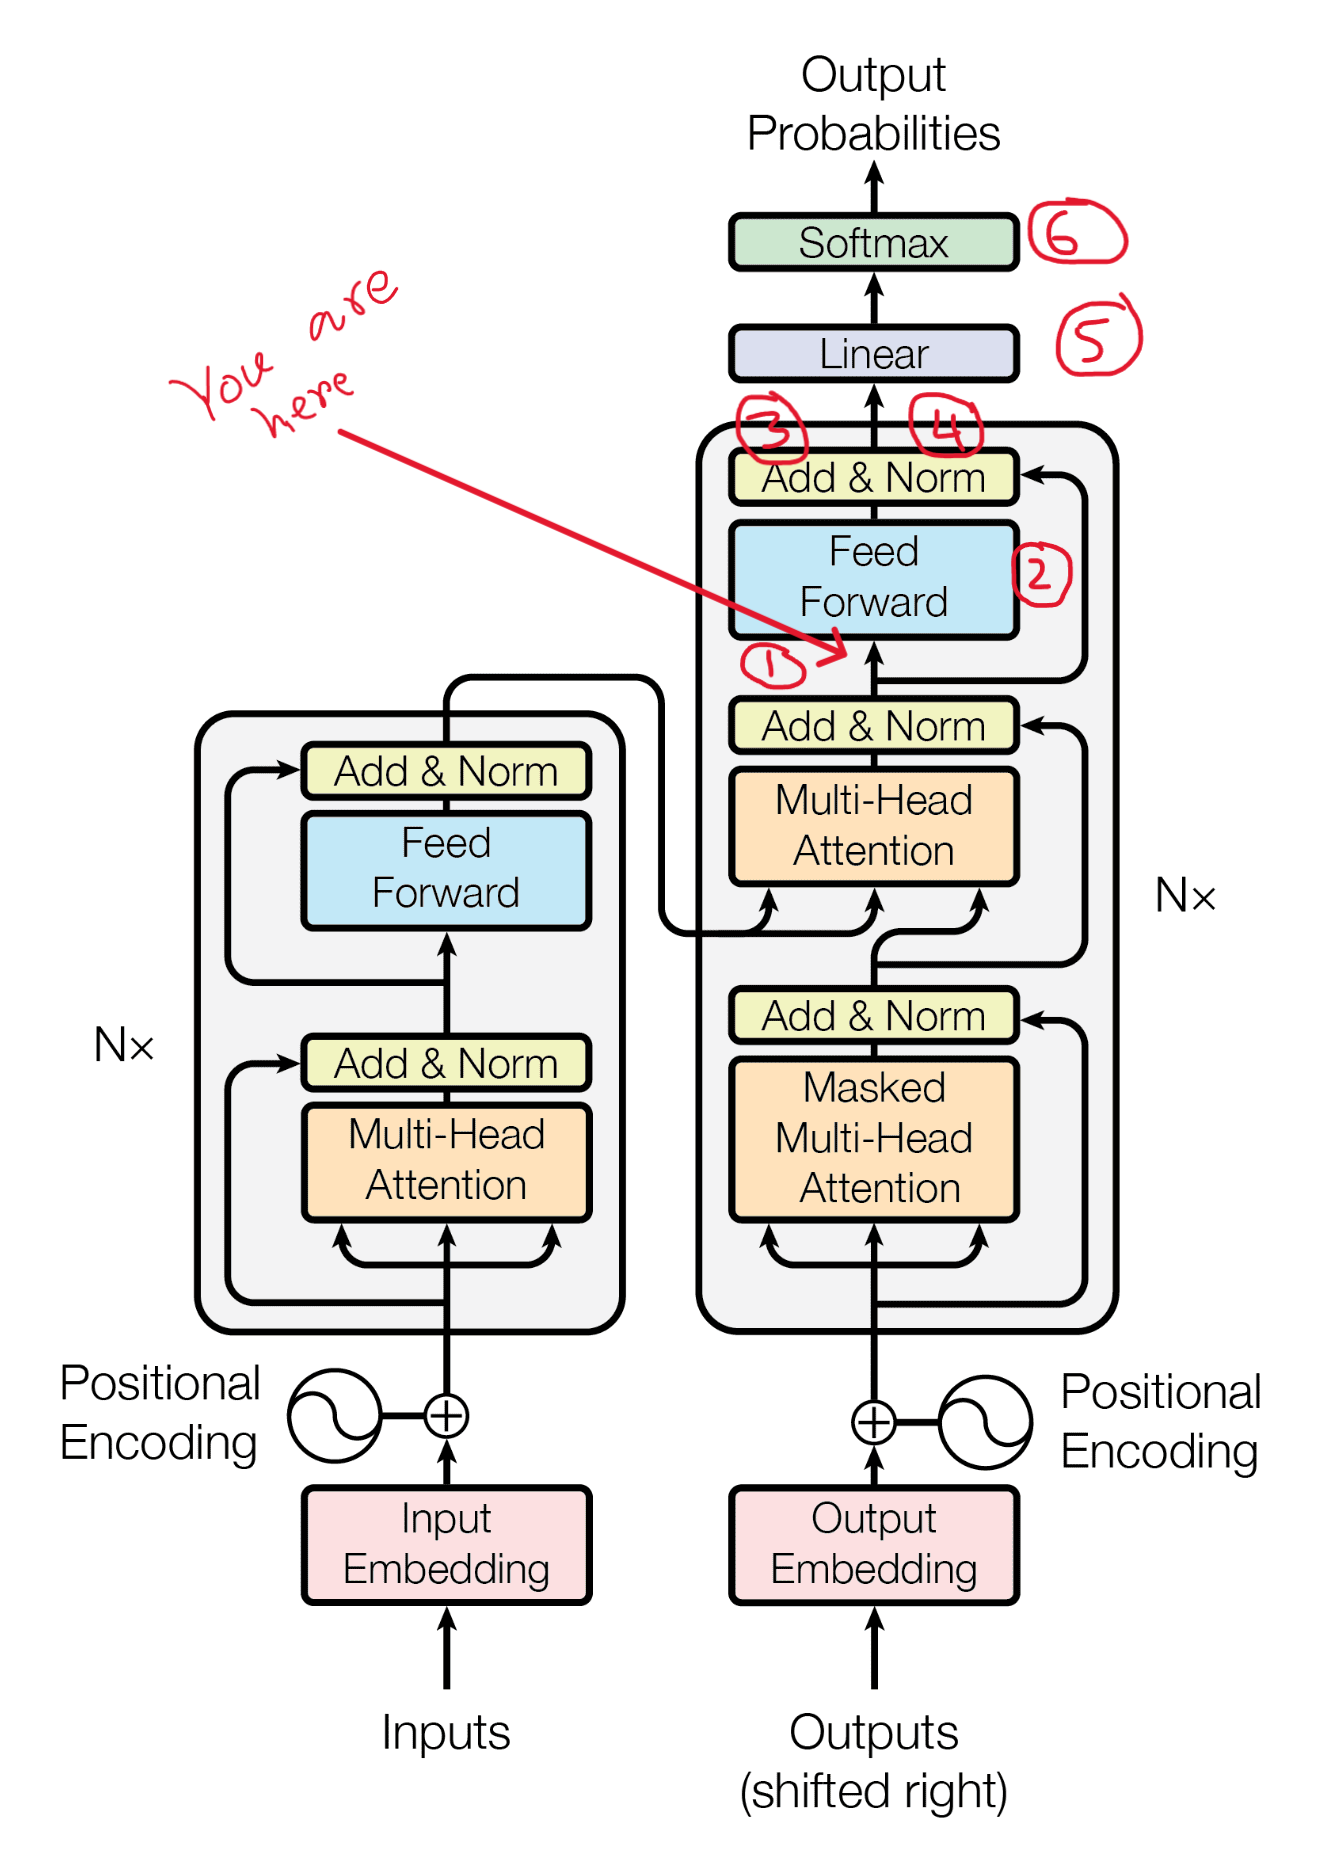

# Vocabulary

In [ ]:
# To generate next probable token, we will need a set of words.
# We will assume that we have a vocabulary of 10 words only.
# So, the decoder has to select one of the 10 words as the next generated token.

vocab = ["town", "road", "river", "city", "apple", "yellow", "good", "capital", "country", "state"]

# Step 1: Output from Self Attention

$X_{attn} = \text{self-attention()}$

Here,

$[X_{attn} ∈ R^{2×4}]$

number of tokens = 2 and embedding dimension = 4

In [ ]:
# As mentioned before, we assume that the input embeddings of the words "New" and "York" have already passed the self attention and cross attention layers.
# So at this stage, what we have is a matrix with attention representation of those two words.  Let's call this matrix contextual_embedding_matrix.
# For simplicity, we will consider that these two tokens have embedding dimension of 4.
# The values of the matrix are random.
# The output shape will be (2, 4)


np.random.seed(SEED)
random.seed(SEED)

embed_dimension = 4
number_of_tokens = 2

contextual_embedding_matrix = np.random.randn(number_of_tokens, embed_dimension)
print("\n==== Step 1: Contextual Embedding Matrix for the two words ====")
print(contextual_embedding_matrix)

# Step 2: MLP (Feed Forward Neural Network) (Do not change)

First Linear Transformation: $ H = X.W_{1} + b_{1}$​

Non-linearity (ReLU): $ A = RELU(H)$

$ MLP_{out} = A.W_{2}​ + b_{2} $​

In [ ]:
# This is a simple feed forward neural network with a dense layer.
# The input to the neural network is the attention representation matrix we have.
# So, the input matrix has shape (2, 4) and the shape of output matrix from the network will also be (2, 4).
# For simplicity, the weight matrices in the network are randomly initialized.

np.random.seed(SEED)
random.seed(SEED)

# Dimensions
input_dim, hidden_dim, output_dim = 4, 8, 4

# Random weights and biases
W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.random.randn(hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.random.randn(output_dim)

# ReLU activation
def relu(x):
    return np.maximum(0, x)

# Feed-forward pass
def ffn_forward(x):
    h = relu(np.dot(x, W1) + b1)  # h_layer = relu(w1.x + b)
    out = np.dot(h, W2) + b2      # out_layer = w2.h_layer + b
    return out

In [ ]:
print("\n==== Step 2: Feed Forward Output ====")
ffn_output = ffn_forward(contextual_embedding_matrix)
print(ffn_output)

# Step 3: Residual Connection

Formula:

$ Z_{residual} = X_{attn}+MLP_{out} $

'''Q4: which of the following code line will produce this output matrix?'''

In [ ]:
# Residual Connection
# Here, we add the input of the feed forward network with the output of the network
# This is just matrix addition


###<-- add your code here
residual_added =
###

print("")
print("\n==== Step 3a: Residual Added: ====\n", residual_added)

# Step 4: Layer Normalization

$$
N(x) = \frac{x - \mu}{\alpha}
$$

$$
\mu = \frac{1}{H} \sum_{i=1}^{H} X_i
$$

$$
\alpha = \sqrt{ \frac{1}{H} \sum_{i=1}^{H} (x_i - \mu)^2 }
$$

Where:

- \( h \) = Output from Layer normalization  
- \( x \) = Vector representation of inputs  
- \( H \) = Number of inputs  
- \( \mu \) = Mean of inputs  
- \( \alpha \) = Standard deviation of inputs


'''Q5: To calculate layer normalization, we need to calculate variance. Which of the following code line should we use to calculate the variance?'''

'''Q6: How is Layer Normalization different from Batch Normalization?'''

In [ ]:
# Layer normalization
# Here, we do row wise normalization
# For each row, we find the mean and variance.
# Then we subtract the mean and divide by sqrt(variance) for each element in a row.
# You can use np.mean() for mean calculation and np.var() to calculate variance.
# In actual implementation, there are two more parameters - gamma and beta, to keep things simple, we ignore those in this task.

def layer_norm(x, epsilon=1e-5):
    mean = np.mean(x, axis=1, keepdims=True)

    ###<-- add your code here
    variance =
    ###

    return (x - mean) / np.sqrt(variance + epsilon)

decoder_output  = layer_norm(residual_added)
print("\n==== Step 3b: Decoder Output after normalization ====\n", decoder_output )


# Step 5: Output Projection to Vocabulary

Suppose we want to predict the next token (3rd) using the last token output (Token 2's row).

Assume weight matrix for the linear layer: $𝑊_{out} ∈ 𝑅^{4×10}$ → here, embedding size = 4 and vocab size = 10

$logits = \text{contextual embedding of last token} \; (dot \; product) \; W_{out} $


'''Q7: To calculate the logits, which of the following code line should we use??'''

In [ ]:
# Here, we use the decoder output to get logits for each word in the vocabulary
# We do this by using a linear layer. The output of this linear layer will be logits.
# Since, we are doing inference, we only need the decoder output of the last token.

np.random.seed(SEED)
random.seed(SEED)

# Get last token from the decoder output
last_token_representation = decoder_output[-1]

# Linear layer
# The input to the linear layer will be the last token in the decoder output; input shape is the embedding dimension
# Output will be logits over all the words in the vocabulary, since we have 10 words in the vocabulary, output shape will be the vocabulary size

A = embed_dimension
B = len(vocab)

V_W = np.random.randn(A, B) # weight matrix for the linear layer

###<-- add your code here
logits =
###

print("\n==== Step 4: Linear Projection ====")
print("Logits:\n", logits)

# Step 6: Softmax

Formula for softmax:

$softmax(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}}$

In [ ]:
# In this step, we will convert the raw logit scores to probabilities
# The input to the softmax will be the logits; shape (10)
# The output will be the probabilities across words in the vocabulary; shape (10)

def softmax(x):
    x_exp = np.exp(x)
    return x_exp / np.sum(x_exp)

probs = softmax(logits)
print("\n==== Step 5: Softmax ====")
print("Probabilities:\n", probs)


# Step 7: Inference - Greedy Decoding


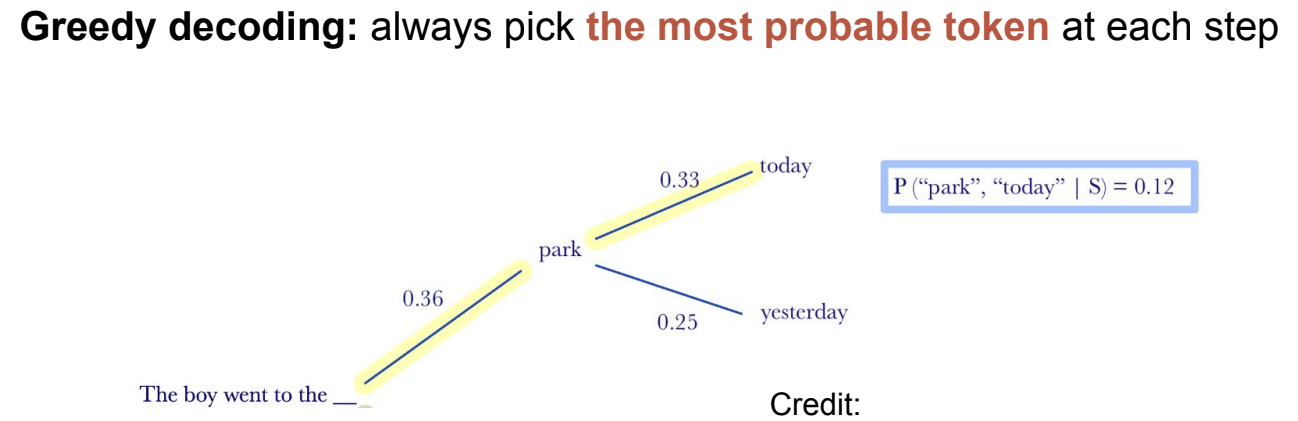

'''Q8: Which of the following does the greedy decoding select as the next predicted word?'''

In [ ]:
# Since we have 10 words in vocabulary, and we have probability for each word
# We will select the word that has the highest probability
# To do that, we will first select the index where the probability is maximum and print the word in that index from the vocabualry

# select the index where the probability is maximum
print("\n==== Step 6a: Greedy Decoding ====")


###<-- add your code here
greedy_idx =
###

print("Greedy Token ID --> ", greedy_idx)

# Map Token ID to Word
greedy_word = vocab[greedy_idx]
print("Greedy Predicted Word --> ", greedy_word)

# Step 8: Inference - Top-p Sampling

Instead of considering all possible tokens, it only considers a subset of tokens whose cumulative probability exceeds a certain threshold (p).

It works like the below steps:
1. Calculate Probabilities - The decoder predicts a probability distribution over all possible tokens for the next word.
2. Sort - The tokens are sorted by their predicted probabilities in descending order.  
3. Accumulate - The probabilities are then cumulatively summed.
3. Threshold (p) - A value p (typically between 0.7 and 0.95) is set, representing the cumulative probability threshold.
4. Select Subset - The model selects the smallest set of tokens whose cumulative probability exceeds the threshold p.
5. Sample from Subset - A token is randomly sampled from this selected subset.

In [ ]:
# Do not change this part
# The following function takes the probability distribution found in the previous step and a threshold p as input
# The function returns a word index

np.random.seed(SEED)
random.seed(SEED)

def top_p_sample(prob_row, p):
    # sort
    sorted_indices = np.argsort(prob_row)[::-1]
    sorted_probs = prob_row[sorted_indices]

    # accumulate
    cum_probs = np.cumsum(sorted_probs)

    # select subset
    cutoff = np.argmax(cum_probs >= p) + 1
    top_indices = sorted_indices[:cutoff]
    print("Subset indexes: ", top_indices)
    top_probs = sorted_probs[:cutoff]
    top_probs /= np.sum(top_probs)
    print("Corresponding Subset probabilities: ", top_probs)

    # sample from subset
    return np.random.choice(top_indices, p=top_probs)

'''Q9: Which of the following does the top-p sampling select as the next predicted word when threshold = 0.3 ?'''

'''Q10: Which of the following does the top-p sampling select as the next predicted word when threshold = 0.75 ?'''

In [ ]:
print("==== Step 6b: Top-p Sampling ====")

# Set the threshold p for top-p sampling

### <-- Change value here
threshold_p = 0.75
###

# Select a sample using top-p
top_p_ids = [top_p_sample(row, threshold_p) for row in [probs]]
print("Top-p Sampled Token IDs --> ", top_p_ids[0])

# Map Token IDs to Words ====
top_p_words = [vocab[i] for i in top_p_ids]
print("Top-p Sampled Words --> ", top_p_words[0])